In [1]:
import os
import sys
import pandas as pd
pd.set_option('display.max_rows', None)

current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)

# from swp.utils.setup import seed_everything, set_device
# from swp.datasets.phonemes import get_phoneme_to_id

# seed_everything()
# device = set_device()
# phoneme_to_id = get_phoneme_to_id()

In [5]:
def process_csv_files(folder_path):
    # Get all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    processed_dataframes = {}
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        
        # Load CSV, ensuring the first column isn't mistakenly used as an index
        df = pd.read_csv(file_path)
        
        # If the first column is an unintended index, reset it
        if df.columns[0].startswith("Unnamed"):
            df = df.iloc[:, 1:]  # Drop the first unnamed column
        
        # Remove "Training name" column if NaN, otherwise rename it
        if "Training name" in df.columns:
            if df["Training name"].isna().all():
                df.drop(columns=["Training name"], inplace=True)
            else:
                df.rename(columns={"Training name": "Train name"}, inplace=True)
        
        # Rename all "Validation ..." columns to "Valid ..."
        df.rename(columns=lambda col: col.replace("Validation ", "Valid ") if "Validation " in col else col, inplace=True)

        # Ensure "Model name" is explicitly included
        if "Model name" not in df.columns:
            df.insert(0, "Model name", file.replace(".csv", ""))  # Use filename as default model name
        
        # Define required columns and ensure they exist (fill missing with NaN)
        columns_order = [
            "Model name", "Train name", "Model type", "Start token id", "Recurrent type",
            "Hidden size", "Num layers", "Dropout", "Tf ratio", "CNN hidden size", "CorNet model",
            "Batch size", "Learning rate", "Fold", "Include stress", "Epoch",
            "Train loss", "Valid loss", "Train errors", "Valid errors"
        ]
        for col in columns_order:
            if col not in df.columns:
                df[col] = pd.NA

        # Reorder columns
        df = df[columns_order]
        
        # Reset index to avoid double indices
        df.reset_index(drop=True, inplace=True)
        
        # Store the processed DataFrame
        processed_dataframes[file] = df
    
    return processed_dataframes

# Example usage
folder_path = "/Users/danieldager/Desktop/swp-model/results/gridsearch/train"  # Replace with your actual folder path
processed_data = process_csv_files(folder_path)

# Save processed files (optional)
for filename, df in processed_data.items():
    save_path = os.path.join(folder_path, filename)
    df.to_csv(save_path, index=False)
    print(f"Processed file saved: {save_path}")

Processed file saved: /Users/danieldager/Desktop/swp-model/results/gridsearch/train/Ua_RNN_h256_l1_v42_d0.2_t0.2_s1~b512_l0.001_f0_sn.csv
Processed file saved: /Users/danieldager/Desktop/swp-model/results/gridsearch/train/Ua_LSTM_h256_l1_v42_d0.5_t0.0_s1~b1024_l0.001_f0_sn.csv
Processed file saved: /Users/danieldager/Desktop/swp-model/results/gridsearch/train/Ua_LSTM_h256_l1_v42_d0.1_t0.25_s1~b1024_l0.005_f0_sn.csv
Processed file saved: /Users/danieldager/Desktop/swp-model/results/gridsearch/train/Ua_LSTM_h128_l1_v42_d0.5_t0.0_s1~b1024_l0.005_f0_sn.csv
Processed file saved: /Users/danieldager/Desktop/swp-model/results/gridsearch/train/Ua_RNN_h512_l1_v42_d0.1_t0.25_s1~b1024_l0.0001_f0_sn.csv
Processed file saved: /Users/danieldager/Desktop/swp-model/results/gridsearch/train/Ua_RNN_h256_l1_v42_d0.1_t0.25_s1~b1024_l0.0001_f0_sn.csv
Processed file saved: /Users/danieldager/Desktop/swp-model/results/gridsearch/train/Ua_RNN_h256_l1_v42_d0.1_t0.5_s1~b1024_l0.0001_f0_sn.csv
Processed file save

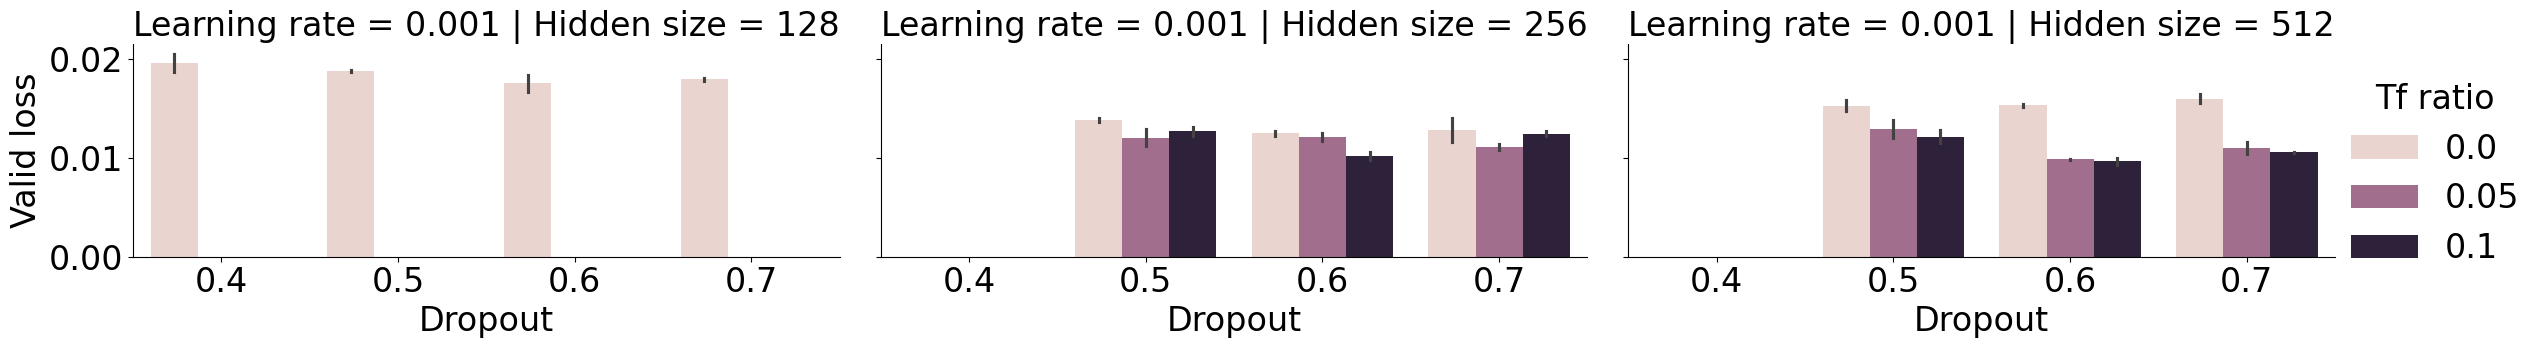

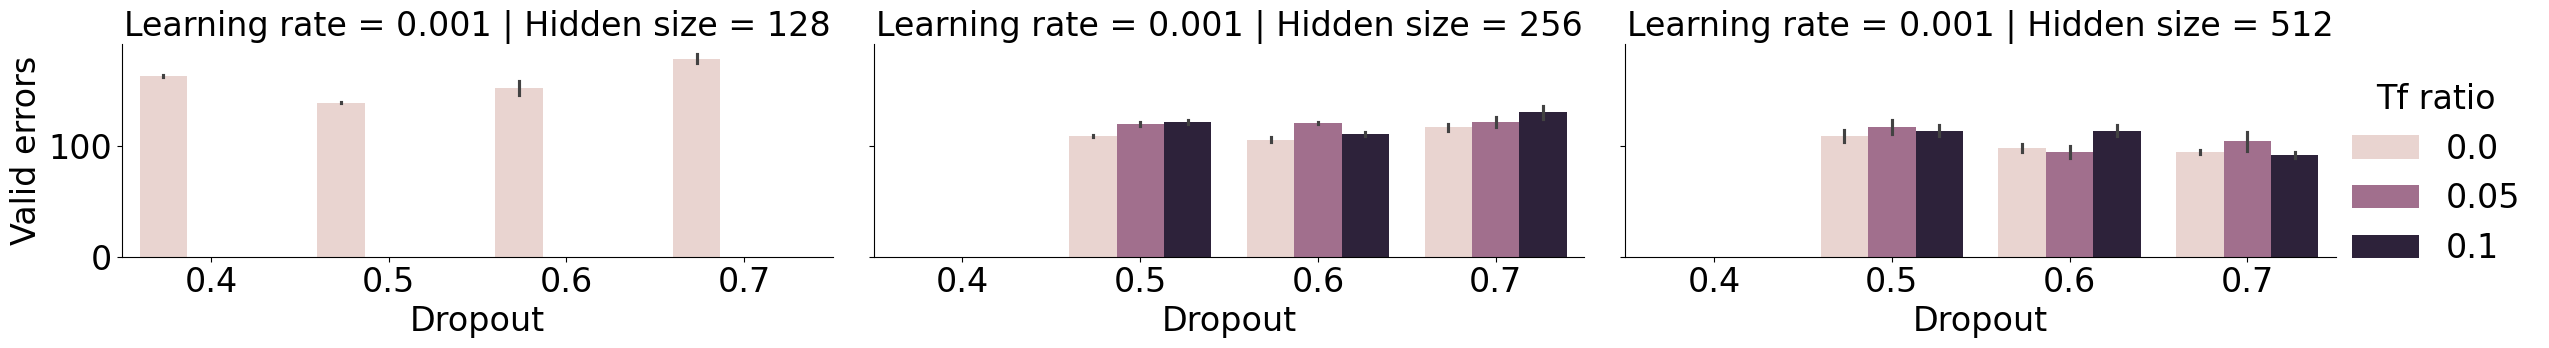

,Model name,Train name,Model type,Start token id,Recurrent type,Hidden size,Num layers,Dropout,Tf ratio,CNN hidden size,CorNet model,Batch size,Learning rate,Fold,Include stress,Epoch,Train loss,Valid loss,Train errors,Valid errors
70,Ua_LSTM_h256_l1_v42_d0.5_t0.0_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,256,1,0.5,0.00,NaN,NaN,1024,0.001,0,0.0,69,0.000185,0.013986,110.0,110.0
1261,Ua_LSTM_h512_l1_v42_d0.5_t0.0_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,512,1,0.5,0.00,NaN,NaN,1024,0.001,0,0.0,70,0.000311,0.015812,161.0,115.0
6191,Ua_LSTM_h512_l1_v42_d0.6_t0.0_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,512,1,0.6,0.00,NaN,NaN,1024,0.001,0,False,70,0.000303,0.015137,162.0,95.0
71,Ua_LSTM_h256_l1_v42_d0.5_t0.0_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,256,1,0.5,0.00,NaN,NaN,1024,0.001,0,0.0,70,0.000278,0.013548,165.0,108.0
5131,Ua_LSTM_h512_l1_v42_d0.5_t0.1_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,512,1,0.5,0.10,NaN,NaN,1024,0.001,0,False,70,0.000198,0.011475,184.0,109.0
4811,Ua_LSTM_h512_l1_v42_d0.7_t0.0_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,512,1,0.7,0.00,NaN,NaN,1024,0.001,0,False,70,0.000368,0.016398,191.0,93.0
1260,Ua_LSTM_h512_l1_v42_d0.5_t0.0_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,512,1,0.5,0.00,NaN,NaN,1024,0.001,0,0.0,69,0.000369,0.014696,193.0,104.0
4611,Ua_LSTM_h256_l1_v42_d0.5_t0.05_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,256,1,0.5,0.05,NaN,NaN,1024,0.001,0,False,70,0.000249,0.012906,196.0,118.0
6581,Ua_LSTM_h256_l1_v42_d0.5_t0.1_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,256,1,0.5,0.10,NaN,NaN,1024,0.001,0,False,70,0.000240,0.013108,210.0,120.0
5871,Ua_LSTM_h256_l1_v42_d0.6_t0.0_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,256,1,0.6,0.00,NaN,NaN,1024,0.001,0,False,70,0.000337,0.012676,215.0,108.0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from swp.utils.grid_search import grid_search_aggregate

plt.rcParams.update({"font.size": 24})

# Aggregate the results
# grid_search_aggregate()

# Load the results with pandas 
results = pd.read_csv('../results/gridsearch/aggregated_training.csv')
results = results.sort_values(by='Train errors')
# results

# Get the ranges for all of the hyperparameters 
# print(results['Learning rate'].unique())
# print(results['Hidden size'].unique())
# print(results['Dropout'].unique())
# print(results['Tf ratio'].unique())
# print(results['Recurrent type'].unique())

# Get only column Epoch = 50 and sort by validation accuracy
# results = results[results['Epoch'] == 49]

# rnns = results[results['Recurrent type'] == 'RNN']
# # rnns = rnns[rnns["Tf ratio"] > 0.1]
# rnns = rnns.sort_values(by='Train errors')
# sns.catplot(
#     data=rnns, 
#     y='Train loss', 
#     x="Learning rate", 
#     # row="Tf ratio", 
#     col="Hidden size", 
#     hue="Dropout", 
#     kind='bar',
#     height=4,
#     aspect=2
# )
# plt.show()
# rnns

# lstms = results[results['Recurrent type'] == 'LSTM']
# # lstms = lstms[lstms["Learning rate"] == 0.0005]
# lstms = lstms[lstms["Epoch"] == 49]
# lstms = lstms.sort_values(by='Valid errors')
# sns.catplot(
#     data=lstms, 
#     y='Valid loss', 
#     x = "Learning rate",
#     col="Hidden size",
#     hue="Tf ratio",
#     # row="Tf ratio", 
#     kind='bar',
#     height=4,
#     aspect=2
# )
# plt.show()

lstms = results[results['Recurrent type'] == 'LSTM']
lstms = lstms[lstms["Epoch"] > 68]
lstms = lstms[lstms["Learning rate"] == 0.001]
sns.catplot(
    data=lstms, 
    y='Valid loss', 
    x="Dropout",
    col="Hidden size",
    row="Learning rate",
    hue="Tf ratio", 
    kind='bar',
    height=4,
    aspect=2
)
plt.show()
sns.catplot(
    data=lstms, 
    y='Valid errors', 
    x="Dropout",
    col="Hidden size",
    row="Learning rate",
    hue="Tf ratio", 
    kind='bar',
    height=4,
    aspect=2
)
plt.show()
lstms


KeyError: 'RNN'

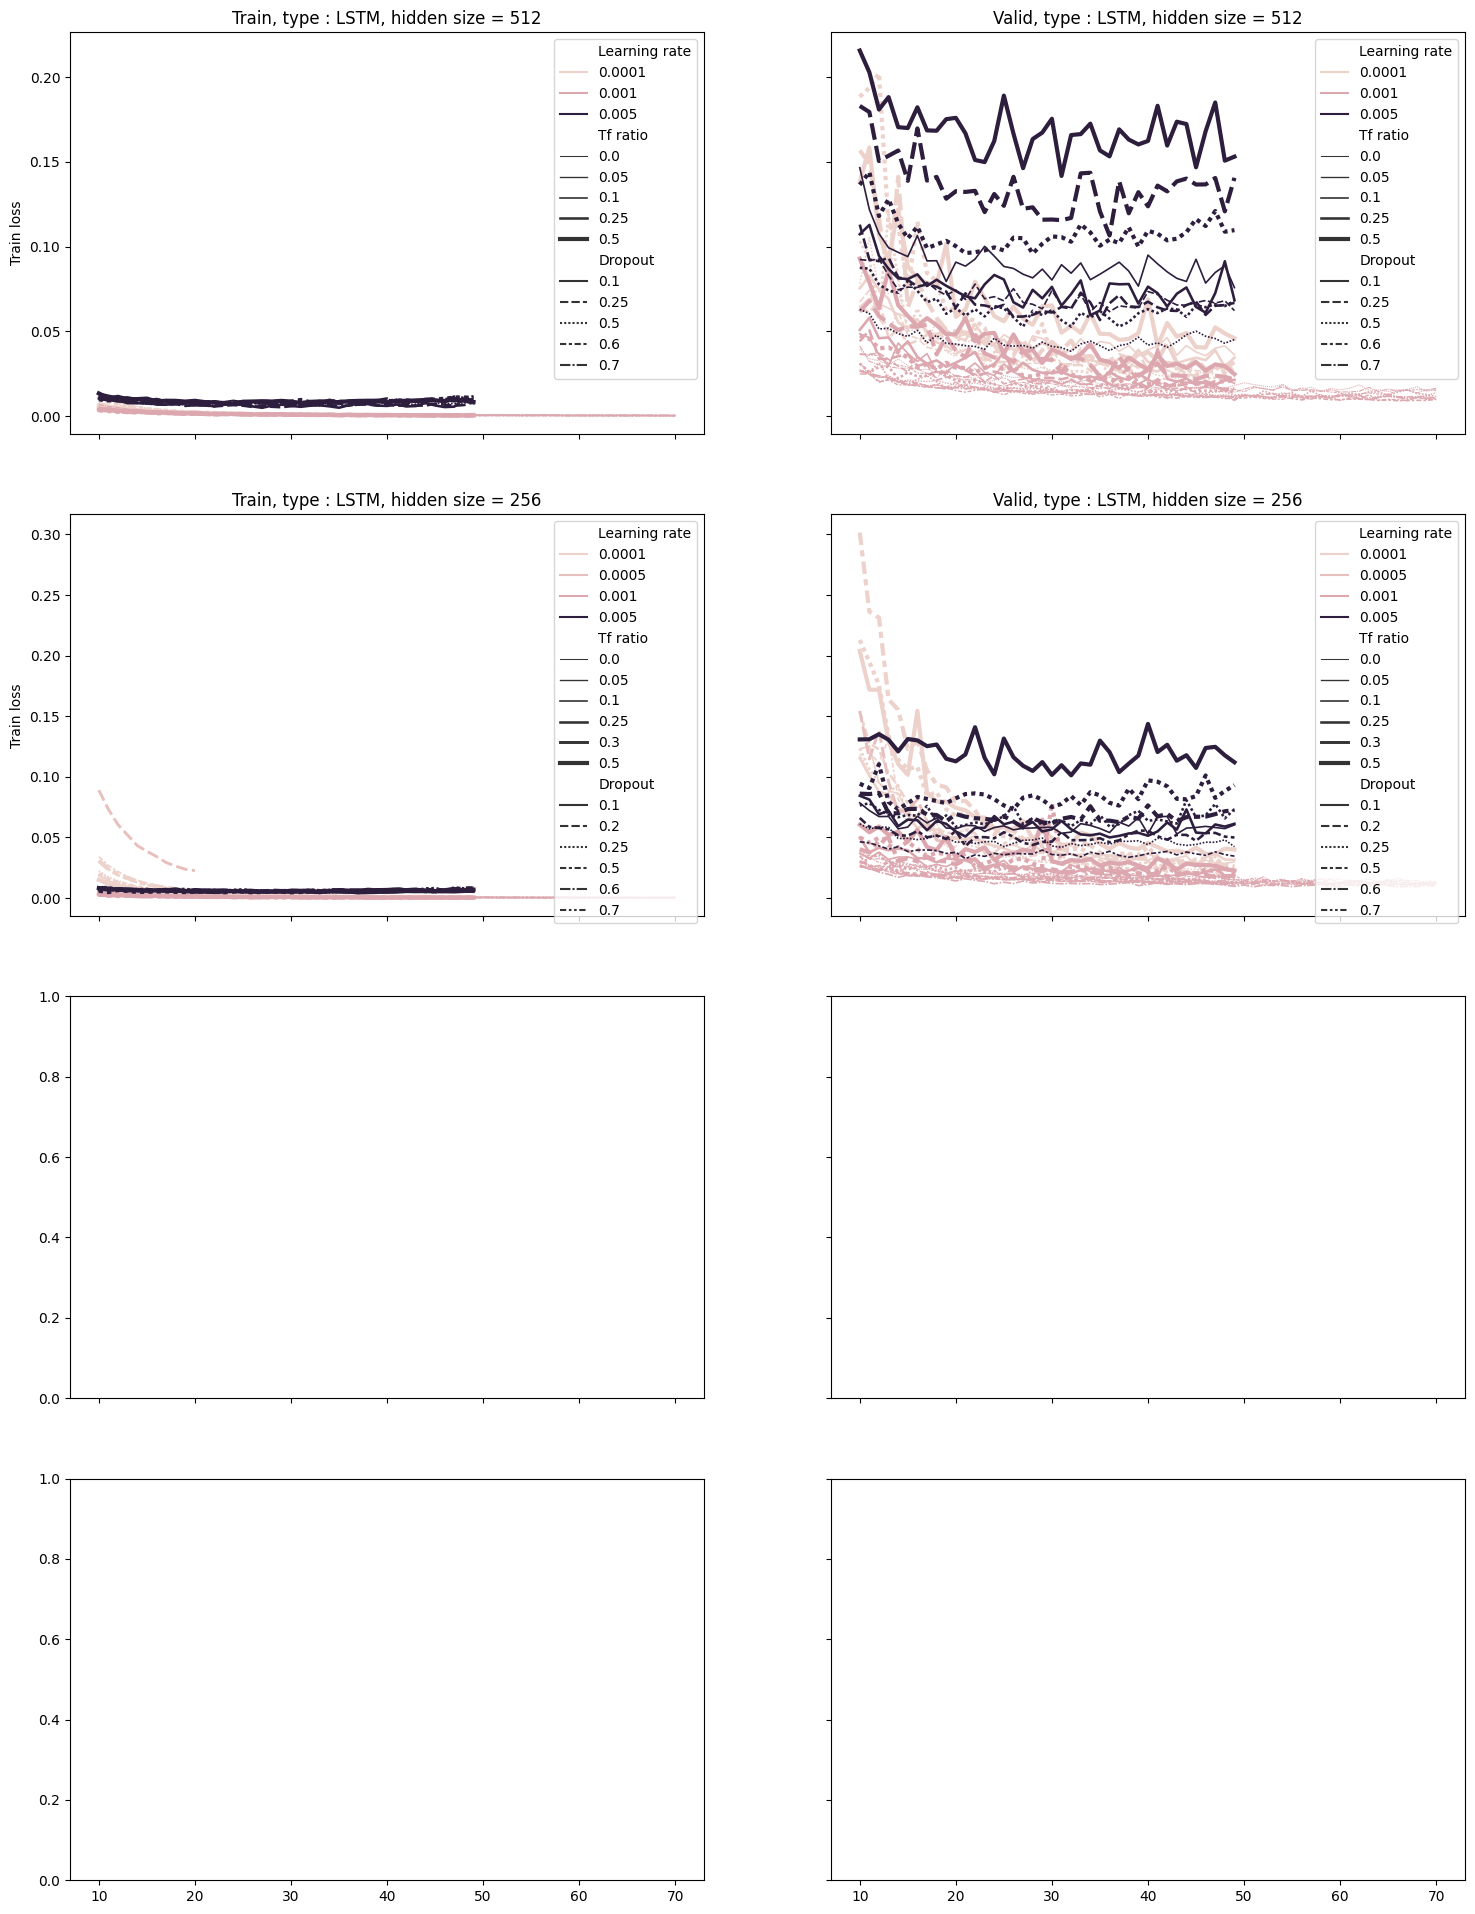

In [6]:
# df_1024 = results[results["Recurrent type"]=="LSTM"]
df_1024 = results[results["Batch size"]==1024]
df_1024_e10 = df_1024[df_1024["Epoch"] >= 10]
grouped = df_1024_e10.groupby("Recurrent type")
f, axs = plt.subplots(4, 2, figsize=(18, 24), sharex=True, sharey="row")
count = 0
for rec_type in results["Recurrent type"].unique():
    rec = grouped.get_group(rec_type)
    rec_grouped = rec.groupby("Hidden size")
    for hidden in rec["Hidden size"].unique():
        hid = rec_grouped.get_group(hidden)
        curr_df = hid
        fig = sns.lineplot(
            curr_df,
            x="Epoch",
            y="Train loss",
            hue="Learning rate",
            size="Tf ratio",
            style="Dropout",
            ax=axs[count, 0],
        )
        fig.set_title(f"Train, type : {rec_type}, hidden size = {hidden}")
        fig2 = sns.lineplot(
            curr_df,
            x="Epoch",
            y="Validation loss",
            hue="Learning rate",
            size="Tf ratio",
            style="Dropout",
            ax=axs[count, 1],
        )
        fig2.set_title(f"Valid, type : {rec_type}, hidden size = {hidden}")
        count += 1
plt.show()
# dropout -> style
# tf ratio -> size
# hidden size -> split
# rec type -> split
# batch size -> pre filtered
# learning rate -> hue
